In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn import tree
from sklearn import metrics
import sklearn.neighbors 
import sklearn.ensemble

In [84]:
Dset=pd.read_csv("/Users/anasmac/Desktop/Car_Insurance_Claim.csv")

In [87]:
Dset.head(10)


,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
5,877557,40-64,female,majority,20-29y,high school,upper class,0.619127,1.0,after 2015,0.0,1.0,10238,13000.0,sedan,3,0,3,0.0
6,930134,65+,male,majority,30y+,high school,upper class,0.492944,0.0,after 2015,1.0,1.0,10238,13000.0,sedan,7,0,3,0.0
7,461006,26-39,female,majority,0-9y,university,working class,0.468689,0.0,after 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,1.0
8,68366,40-64,female,majority,20-29y,university,working class,0.521815,0.0,before 2015,1.0,0.0,10238,13000.0,sedan,0,0,0,0.0
9,445911,40-64,female,majority,0-9y,high school,upper class,0.561531,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,1.0


In [88]:
for col in Dset.columns:
    print(col)

ID
AGE
GENDER
RACE
DRIVING_EXPERIENCE
EDUCATION
INCOME
CREDIT_SCORE
VEHICLE_OWNERSHIP
VEHICLE_YEAR
MARRIED
CHILDREN
POSTAL_CODE
ANNUAL_MILEAGE
VEHICLE_TYPE
SPEEDING_VIOLATIONS
DUIS
PAST_ACCIDENTS
OUTCOME


In [4]:
Dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [5]:
Dset.drop('ID',axis=1,inplace = True)
Dset['CREDIT_SCORE'].fillna(Dset['CREDIT_SCORE'].mean(), inplace = True)
Dset['ANNUAL_MILEAGE'].fillna(float(round(Dset['ANNUAL_MILEAGE'].mean())), inplace = True)

In [6]:
Dset['AGE'].value_counts()

26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64

In [7]:
Dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         10000 non-null  float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       10000 non-null  float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

In [8]:
Dset['AGE'].replace({"26-39": 0, "40-64": 1, '16-25':2, "65+":3}, inplace=True)
Dset['GENDER'].replace({"female": 0, "male": 1}, inplace=True)
Dset['RACE'].replace({"minority": 0, "majority": 1}, inplace=True)
Dset['DRIVING_EXPERIENCE'].replace({"0-9y": 0, "10-19y": 1, "20-29y": 2, '30y+':3}, inplace=True)
Dset['EDUCATION'].replace({"high school": 0, "university": 1, 'none':2}, inplace=True)
Dset['INCOME'].replace({"upper class": 0, "middle class": 1, "poverty": 2, 'working class':3}, inplace=True)
Dset['VEHICLE_YEAR'].replace({"before 2015": 0, "after 2015": 1}, inplace=True)
Dset['VEHICLE_TYPE'].replace({"sedan": 0, "sports car": 1}, inplace=True)


In [79]:
y = Dset['OUTCOME']
x = Dset.drop('OUTCOME', axis = 1)
train_X, test_X, train_y, test_y = train_test_split(x, y,
                                                    train_size=0.7 ,
                                                    test_size = 0.3,
                                                    random_state =42)

# Trying Decision Tree Classifier

In [81]:
DT=tree.DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
DT = DT.fit(train_X, train_y)
pred_y = DT.predict(test_X)
precision = metrics.accuracy_score(pred_y, test_y) * 100
precision
matric

80.63333333333334

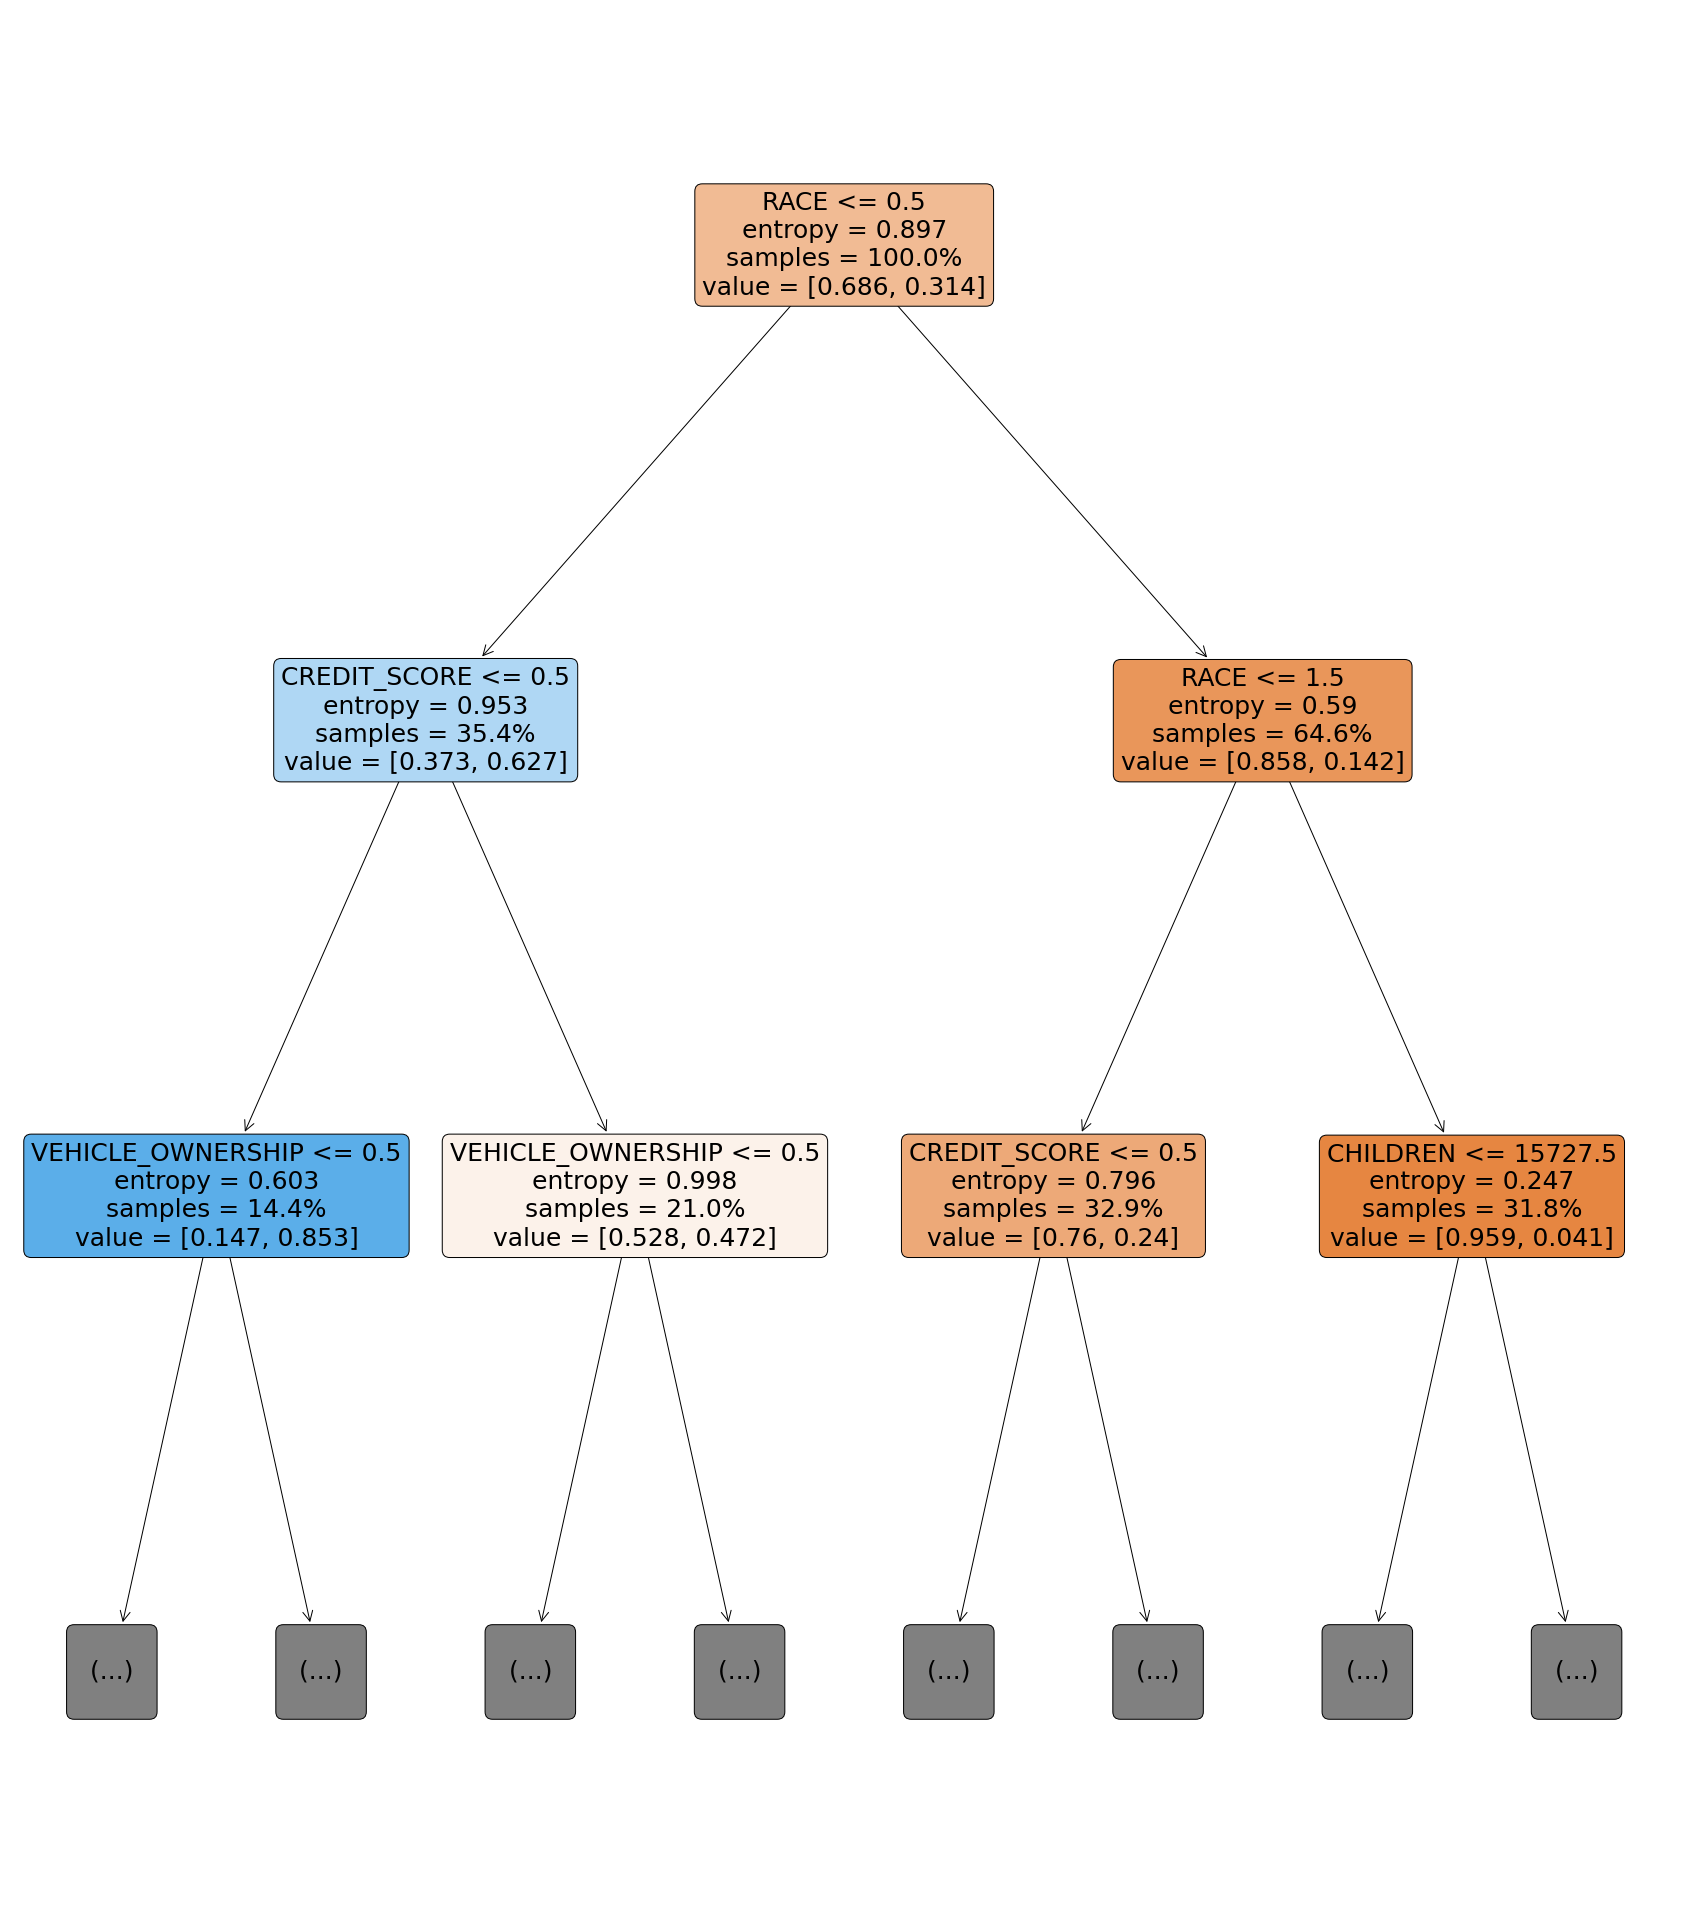

In [99]:


plt.figure(figsize=(30,35))
DTplot= tree.plot_tree(DT,
                        feature_names = Dset.columns,
                        max_depth = 2,
                        fontsize = 25,
                        filled = True,
                        proportion=False,
                        rounded=True,
                        label='all')

In [92]:
print(classification_report(test_y, pred_y))



              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      2063
         1.0       0.69      0.68      0.69       937

    accuracy                           0.81      3000
   macro avg       0.77      0.77      0.77      3000
weighted avg       0.81      0.81      0.81      3000



/Users/anasmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


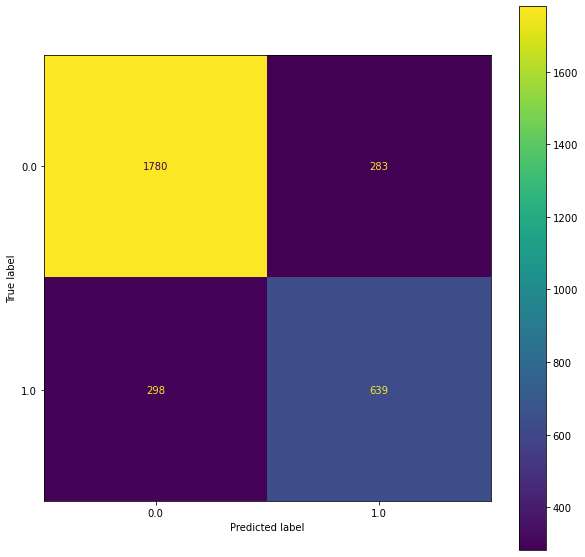

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))
_ = plot_confusion_matrix(DT, test_X, test_y, ax = ax)

# Trying Knighbors Classifier


In [59]:
kn=sklearn.neighbors.KNeighborsClassifier(metric= 'manhattan', n_neighbors= 12)
kn = kn.fit(train_X, train_y)
pred_y = kn.predict(test_X)
precision = metrics.accuracy_score(pred_y, test_y) * 100
precision

81.93333333333334

# Trying RandomForest Classifier

In [107]:
rf=sklearn.ensemble.RandomForestClassifier( n_estimators= 150)
rf = rf.fit(train_X, train_y)
pred_y = rf.predict(test_X)
precision = metrics.accuracy_score(pred_y, test_y) * 100
precision

83.46666666666667